# **Basic computational drug discovery project to build ML models using ChEMBL bioactivity data for SARS COV 2 protein.**

# **Part 1: Obtaining data from ChEMBL database**

ChEMBL is a manually curated database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs.
website: [ChEMBL](https://www.ebi.ac.uk/chembl/). We will install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

**Install and load libraries**

In [ ]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 60 kB 6.6 MB/s 
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

**Search for target protein**

In [ ]:
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


Selected single protein for sars coronavirus2; that is present on index 7 in table above. we will retrieve only bioactivity data for this chembl id that are reported as pChEMBL values.

In [ ]:
selected_target = targets.target_chembl_id[7]
selected_target

'CHEMBL4523582'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df=pd.DataFrame.from_dict(res)

In [ ]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,Dtt Insensitive,19964199,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.39
1,Dtt Insensitive,19964200,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.21
2,Dtt Insensitive,19964201,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.08
3,Dtt Insensitive,19964202,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,1.58
4,Dtt Insensitive,19964203,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,None,23254367,[],CHEMBL4831803,Inhibition of SARS-CoV-2 RdRp transfected in h...,B,None,None,BAO_0000190,BAO_0000219,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,5.37
199,None,23254368,[],CHEMBL4831803,Inhibition of SARS-CoV-2 RdRp transfected in h...,B,None,None,BAO_0000190,BAO_0000219,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,3.11
200,None,23254369,[],CHEMBL4831803,Inhibition of SARS-CoV-2 RdRp transfected in h...,B,None,None,BAO_0000190,BAO_0000219,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,2.18
201,None,23254370,[],CHEMBL4831803,Inhibition of SARS-CoV-2 RdRp transfected in h...,B,None,None,BAO_0000190,BAO_0000219,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,3.85


In [ ]:

df.standard_type.unique()
## drop duplicates if required
# df_nr = df.drop_duplicates(['canonical_smiles'])
# df_nr

array(['IC50'], dtype=object)

Now save this extracted data to file and push to google drive


In [ ]:
df.to_csv('bioactivity_data.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
! ls "/content/gdrive/My Drive/Colab Notebooks/"

data	  door2_data.ipynb  microbeonline.ipynb       ngschool.ipynb
data.csv  elucidata.ipynb   mlfordrugdiscovery.ipynb  Untitled0.ipynb


In [ ]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/data_ml"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/data’: File exists


In [ ]:
! cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/data_ml"

In [ ]:
! ls -l "/content/gdrive/My Drive/Colab Notebooks/data"

-rw------- 1 root root 116998 Aug 27 14:59 '/content/gdrive/My Drive/Colab Notebooks/data'


In [ ]:
! ls

bioactivity_data.csv  gdrive  sample_data


In [ ]:
! head bioactivity_data.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
Dtt Insensitive,19964199,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 determined by FRET kind of response from peptide substrate,F,,,BAO_0000190,BAO_0000019,assay format,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,,,CHEMBL4495564,,2020,,CHEMBL480,LANSOPRAZOLE,CHEMBL480,6.41,0,http://www.openphacts.or

**Handling missing value**

If any compounds has missing value for the standard_value and canonical_smiles column then drop it. Here there was no na value for smiles, so I have commented it.

In [ ]:
df2 = df[df.standard_value.notna()]
#  df2 = df2[df.canonical_smiles.notna()] ##if required
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,Dtt Insensitive,19964199,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.39
1,Dtt Insensitive,19964200,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.21
2,Dtt Insensitive,19964201,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.08
3,Dtt Insensitive,19964202,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,1.58
4,Dtt Insensitive,19964203,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,BAO_0000019,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,None,23254367,[],CHEMBL4831803,Inhibition of SARS-CoV-2 RdRp transfected in h...,B,None,None,BAO_0000190,BAO_0000219,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,5.37
199,None,23254368,[],CHEMBL4831803,Inhibition of SARS-CoV-2 RdRp transfected in h...,B,None,None,BAO_0000190,BAO_0000219,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,3.11
200,None,23254369,[],CHEMBL4831803,Inhibition of SARS-CoV-2 RdRp transfected in h...,B,None,None,BAO_0000190,BAO_0000219,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,2.18
201,None,23254370,[],CHEMBL4831803,Inhibition of SARS-CoV-2 RdRp transfected in h...,B,None,None,BAO_0000190,BAO_0000219,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,3.85


**Data preprocessing**

**Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [ ]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

In [ ]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

In [ ]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

In [ ]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

In [ ]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [ ]:
df3.head(4)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,1580.0


Alternate to create the four list and new data type. Below, df4 is same as df3

In [ ]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df4 = df2[selection]
df4.head(4)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0


In [ ]:
pd.concat([df4,pd.Series(bioactivity_class, name='class')], axis=1)

,molecule_chembl_id,canonical_smiles,standard_value,0
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active
...,...,...,...,...
198,CHEMBL4878063,CN(Cc1ccccc1)C(=O)CSc1c[nH]c2ccccc12,5370.0,intermediate
199,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,3110.0,intermediate
200,CHEMBL4845924,COc1ccccc1CNC(=O)CSc1c[nH]c2c(-c3ccccc3)cccc12,2180.0,intermediate
201,CHEMBL4869436,O=C(CSc1c[nH]c2cccc(Br)c12)N(Cc1ccccc1)Cc1ccccc1,3850.0,intermediate


Saving resultant pre-processed data to drive.

In [ ]:
df3.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [ ]:
! ls -l

total 144
-rw-r--r-- 1 root root 116998 Aug 27 14:58 bioactivity_data.csv
-rw-r--r-- 1 root root  17725 Aug 27 15:04 bioactivity_preprocessed_data.csv
drwx------ 5 root root   4096 Aug 27 14:59 gdrive
drwxr-xr-x 1 root root   4096 Aug 15 13:44 sample_data


In [ ]:
! cp bioactivity_preprocessed_data.csv "/content/gdrive/My Drive/Colab Notebooks/data_ml"

In [ ]:
! ls "/content/gdrive/My Drive/Colab Notebooks/data"

'/content/gdrive/My Drive/Colab Notebooks/data'


# **PART 2:- exploratory data analysis**

performing Descriptor Calculation and Exploratory Data Analysis.

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-09-05 11:03:21--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   203MB/s    in 0.4s    

2022-09-05 11:03:22 (203 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b64

**Load bioactivity data**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data_ml/bioactivity_preprocessed_data.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,40.0
...,...,...,...,...
197,CHEMBL4878063,CN(Cc1ccccc1)C(=O)CSc1c[nH]c2ccccc12,intermediate,5370.0
198,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,intermediate,3110.0
199,CHEMBL4845924,COc1ccccc1CNC(=O)CSc1c[nH]c2c(-c3ccccc3)cccc12,intermediate,2180.0
200,CHEMBL4869436,O=C(CSc1c[nH]c2cccc(Br)c12)N(Cc1ccccc1)Cc1ccccc1,intermediate,3850.0


**Lipinski descriptors**

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton
Octanol-water partition coefficient (LogP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        # print(elem)
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

Removing rows where canonical smiles is nan.

In [ ]:
df2 = df[df.canonical_smiles.notna()]

In [ ]:
df2

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,40.0
...,...,...,...,...
197,CHEMBL4878063,CN(Cc1ccccc1)C(=O)CSc1c[nH]c2ccccc12,intermediate,5370.0
198,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,intermediate,3110.0
199,CHEMBL4845924,COc1ccccc1CNC(=O)CSc1c[nH]c2c(-c3ccccc3)cccc12,intermediate,2180.0
200,CHEMBL4869436,O=C(CSc1c[nH]c2cccc(Br)c12)N(Cc1ccccc1)Cc1ccccc1,intermediate,3850.0


In [ ]:
df2_lipinski = lipinski(df2.canonical_smiles)

In [ ]:
df2_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,369.368,3.51522,1.0,4.0
1,226.351,3.30451,0.0,5.0
2,334.400,3.26220,0.0,5.0
3,458.375,2.23320,8.0,11.0
4,237.052,2.22770,0.0,2.0
...,...,...,...,...
190,310.422,3.91860,1.0,2.0
191,602.585,2.31218,4.0,13.0
192,402.519,5.25200,2.0,3.0
193,465.416,6.25150,1.0,2.0


combine the two dataframes

In [ ]:
df2.reset_index(drop=True, inplace=True)
df2_lipinski.reset_index(drop=True, inplace=True)
df_combined = pd.concat([df2,df2_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,390.0,369.368,3.51522,1.0,4.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,210.0,226.351,3.30451,0.0,5.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,80.0,334.400,3.26220,0.0,5.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,1580.0,458.375,2.23320,8.0,11.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,40.0,237.052,2.22770,0.0,2.0
...,...,...,...,...,...,...,...,...
190,CHEMBL4878063,CN(Cc1ccccc1)C(=O)CSc1c[nH]c2ccccc12,intermediate,5370.0,310.422,3.91860,1.0,2.0
191,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,intermediate,3110.0,602.585,2.31218,4.0,13.0
192,CHEMBL4845924,COc1ccccc1CNC(=O)CSc1c[nH]c2c(-c3ccccc3)cccc12,intermediate,2180.0,402.519,5.25200,2.0,3.0
193,CHEMBL4869436,O=C(CSc1c[nH]c2cccc(Br)c12)N(Cc1ccccc1)Cc1ccccc1,intermediate,3850.0,465.416,6.25150,1.0,2.0


In [ ]:
df_combined.standard_value.describe()

count       195.000000
mean      13131.579487
std       30065.957743
min           8.000000
25%         278.000000
50%        1720.000000
75%        5175.000000
max      100000.000000
Name: standard_value, dtype: float64

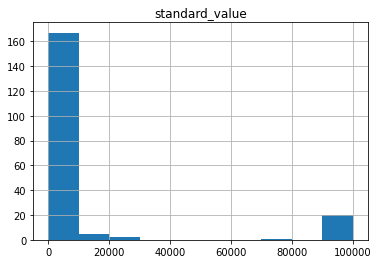

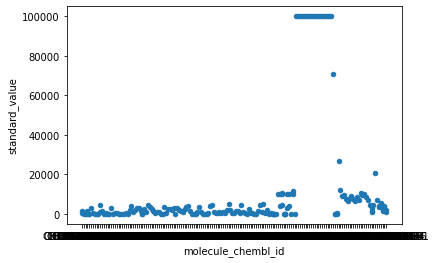

In [ ]:
df_combined.hist(column=["standard_value"])
df_combined.plot.scatter(x="molecule_chembl_id",y="standard_value")

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

IC50 is inhibitory concentration; how much conc. of drug is needed to inhibit a biological process by half.

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,458.375,2.23320,8.0,11.0,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,40.0
...,...,...,...,...,...,...,...,...
190,CHEMBL4878063,CN(Cc1ccccc1)C(=O)CSc1c[nH]c2ccccc12,intermediate,310.422,3.91860,1.0,2.0,5370.0
191,CHEMBL4065616,CCC(CC)COC(=O)[C@H](C)N[P@](=O)(OC[C@H]1O[C@@]...,intermediate,602.585,2.31218,4.0,13.0,3110.0
192,CHEMBL4845924,COc1ccccc1CNC(=O)CSc1c[nH]c2c(-c3ccccc3)cccc12,intermediate,402.519,5.25200,2.0,3.0,2180.0
193,CHEMBL4869436,O=C(CSc1c[nH]c2cccc(Br)c12)N(Cc1ccccc1)Cc1ccccc1,intermediate,465.416,6.25150,1.0,2.0,3850.0


In [ ]:
df_norm.standard_value_norm.describe()

count       195.000000
mean      13131.579487
std       30065.957743
min           8.000000
25%         278.000000
50%        1720.000000
75%        5175.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_final = pIC50(df_norm)
df_final
df_final.to_csv('bioactivity_data_3class_pIC50.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
! cp bioactivity_data_3class_pIC50.csv "/content/gdrive/My Drive/Colab Notebooks/data_ml"
! ls -l "/content/gdrive/My Drive/Colab Notebooks/data_ml"

total 242
-rw------- 1 root root  27449 Sep  5 11:08 bioactivity_data_3class_pIC50.csv
-rw------- 1 root root 116998 Aug 29 03:22 bioactivity_data.csv
-rw------- 1 root root  17725 Aug 29 03:23 bioactivity_preprocessed_data.csv
-rw------- 1 root root  84655 Sep  3 18:25 results.zip


In [ ]:
df_final.hist(column="pIC50")## change in plot from standard value (IC50) to log(IC50)
df_final.plot.scatter(x="molecule_chembl_id",y="pIC50")

In [ ]:
df_final.pIC50.describe()

count    195.000000
mean       5.834262
std        0.998942
min        4.000000
25%        5.286398
50%        5.764472
75%        6.556135
max        8.096910
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
6,CHEMBL55400,Nc1ccc2cc3ccc(N)cc3nc2c1,active,209.252,2.55240,2.0,3.0,6.443697
...,...,...,...,...,...,...,...,...
161,CHEMBL4848534,Cn1cc(SCC(=O)NCc2ccccc2)c2ccccc21,inactive,310.422,3.58680,1.0,3.0,4.569925
162,CHEMBL4864930,Cn1cc(SCC(=O)N(Cc2ccccc2)Cc2ccccc2)c2ccccc21,inactive,400.547,5.49940,0.0,3.0,4.910095
173,CHEMBL4854494,COc1ccccc1CNC(=O)CSc1c[nH]c2ccc(Br)cc12,inactive,405.317,4.34750,2.0,3.0,4.969805
175,CHEMBL4852238,COc1ccccc1CNC(=O)CSc1c[nH]c2cc(Br)ccc12,inactive,405.317,4.34750,2.0,3.0,4.999566


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

**Frequency plot of the 2 bioactivity classes**

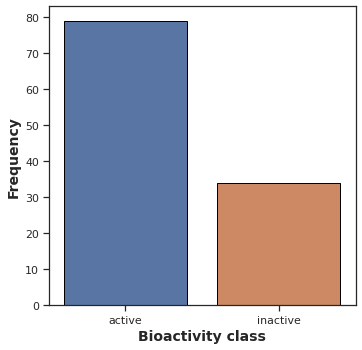

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

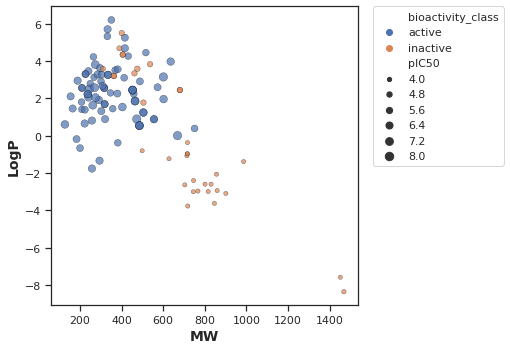

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

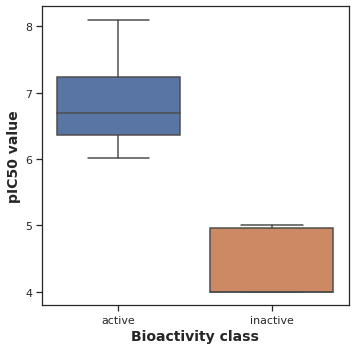

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  # print(selection)
  df = df_2class[selection]
  # print(df)
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results


In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,2686.0,3.489728e-17,0.05,Different distribution (reject H0)


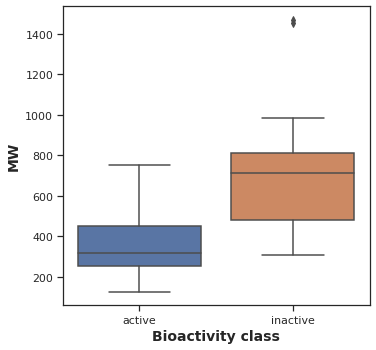

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,285.0,3.582837e-11,0.05,Different distribution (reject H0)


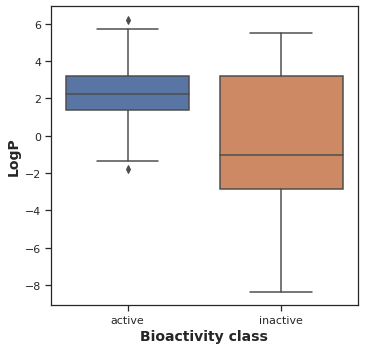

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1875.0,0.000877,0.05,Different distribution (reject H0)


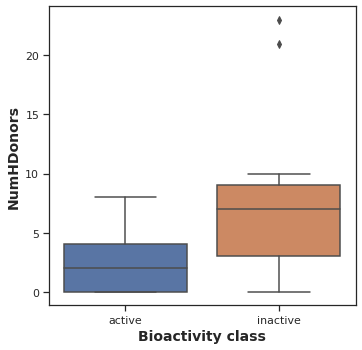

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,510.0,1.381882e-07,0.05,Different distribution (reject H0)


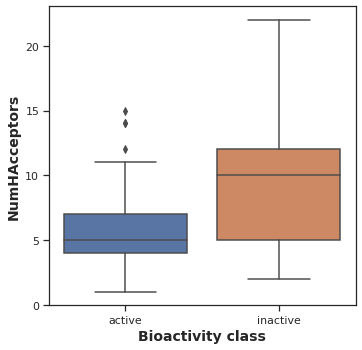

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,704.0,0.000059,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 15%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)


In [ ]:
! cp results.zip "/content/gdrive/My Drive/Colab Notebooks/data_ml"

# PART 3: **Descriptor Calculation and Dataset Preparation**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-09-06 05:30:38--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-09-06 05:30:38--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2022-09-06 05:30:40 (204 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-09-06 05:30:40--  https://gi

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df3 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data_ml/bioactivity_data_3class_pIC50.csv')

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1	CHEMBL480
Cc1c(-c2cnccn2)ssc1=S	CHEMBL178459
O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1	CHEMBL3545157
O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)c(O)c1)c1cc(O)c(O)c(O)c1	CHEMBL297453
O=C1C=Cc2cc(Br)ccc2C1=O	CHEMBL4303595


In [ ]:
! cat molecule.smi | wc -l

195


In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL178459 in molecule.smi (2/195). 
Processing CHEMBL480 in molecule.smi (1/195). 
Processing CHEMBL3545157 in molecule.smi (3/195). Average speed: 1.92 s/mol.
Processing CHEMBL297453 in molecule.smi (4/195). Average speed: 1.32 s/mol.
Processing CHEMBL4303595 in molecule.smi (5/195). Average speed: 1.26 s/mol.
Processing CHEMBL444186 in molecule.smi (6/195). Average speed: 1.05 s/mol.
Processing CHEMBL55400 in molecule.smi (7/195). Average speed: 0.89 s/mol.
Processing CHEMBL1886408 in molecule.smi (8/195). Average speed: 0.91 s/mol.
Processing CHEMBL505670 in molecule.smi (9/195). Average speed: 0.81 s/mol.
Processing CHEMBL460499 in molecule.smi (10/195). Average speed: 0.79 s/mol.
Processing CHEMBL1271993 in molecule.smi (11/195). Average speed: 0.73 s/mol.
Processing CHEMBL3665060 in molecule.smi (12/195). Average speed: 0.66 s/mol.
Processing CHEMBL1096979 in molecule.smi (13/195). Average speed: 0.70 s/mol.
Processing CHEMBL164 in molecule.smi (14/195). Average spe

In [ ]:
! ls -l

total 25556
-rw-r--r-- 1 root root   357950 Sep  6 05:32 descriptors_output.csv
drwx------ 5 root root     4096 Sep  6 05:24 gdrive
drwxr-xr-x 3 root root     4096 Sep  6 05:31 __MACOSX
-rw-r--r-- 1 root root    14211 Sep  6 05:31 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Sep  6 05:30 padel.sh
-rw-r--r-- 1 root root 25768637 Sep  6 05:30 padel.zip
drwxr-xr-x 1 root root     4096 Aug 31 13:47 sample_data


In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL178459,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL480,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL3545157,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL4303595,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL444186,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,CHEMBL4870398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,CHEMBL4065616,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,CHEMBL4845924,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,CHEMBL4857861,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
191,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
192,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
193,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_Y = df3['pIC50']
df3_Y

0      6.408935
1      6.677781
2      7.096910
3      5.801343
4      7.397940
         ...   
190    5.270026
191    5.507240
192    5.661544
193    5.414539
194    5.723538
Name: pIC50, Length: 195, dtype: float64

In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.408935
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.677781
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.096910
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.801343
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.397940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.270026
191,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.507240
192,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.661544
193,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.414539


In [ ]:
dataset3.to_csv('bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
! cp bioactivity_data_3class_pIC50_pubchem_fp.csv "/content/gdrive/My Drive/Colab Notebooks/data_ml"

# Part 4:** Model building**

---



In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data_ml/bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
191,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
192,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
193,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y=df.pIC50
Y

0      6.408935
1      6.677781
2      7.096910
3      5.801343
4      7.397940
         ...   
190    5.270026
191    5.507240
192    5.661544
193    5.414539
194    5.723538
Name: pIC50, Length: 195, dtype: float64

In [ ]:
print(X.shape,Y.shape)

(195, 881) (195,)


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [ ]:
X.shape

(195, 163)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape

((156, 163), (156,))

In [ ]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.02759541311834246

In [ ]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

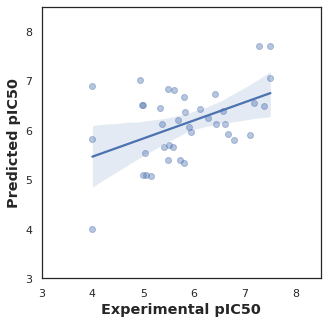

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3, 8.5)
ax.set_ylim(3, 8.5)
ax.figure.set_size_inches(5, 5)
plt.show

# Part 5: **comapare regression models**

In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data_ml/bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [ ]:
print(X.shape,Y.shape)

(195, 881) (195,)


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(195, 163)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)#, random_state=42)

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test=clf.fit(X_train,X_test,Y_train,Y_test)
# models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
# models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:19<00:00,  2.16it/s]


In [ ]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,14414980656461804280659695414978343914185356509...,-4741769952783488470765294257830499817750717397...,19433625213116964951249593711984640.00,0.15
KernelRidge,14.60,-43.73,5.97,0.03
GaussianProcessRegressor,10.22,-29.32,4.91,0.04
LinearRegression,5.17,-12.72,3.31,0.03
TransformedTargetRegressor,5.17,-12.72,3.31,0.05
MLPRegressor,1.57,-0.88,1.22,0.44
LinearSVR,1.55,-0.81,1.20,0.11
HuberRegressor,1.47,-0.55,1.11,0.18
PassiveAggressiveRegressor,1.46,-0.53,1.10,0.04


In [ ]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,14414980656461804280659695414978343914185356509...,-4741769952783488470765294257830499817750717397...,19433625213116964951249593711984640.00,0.15
KernelRidge,14.60,-43.73,5.97,0.03
GaussianProcessRegressor,10.22,-29.32,4.91,0.04
LinearRegression,5.17,-12.72,3.31,0.03
TransformedTargetRegressor,5.17,-12.72,3.31,0.05
MLPRegressor,1.57,-0.88,1.22,0.44
LinearSVR,1.55,-0.81,1.20,0.11
HuberRegressor,1.47,-0.55,1.11,0.18
PassiveAggressiveRegressor,1.46,-0.53,1.10,0.04


[(0.0, 1.0)]

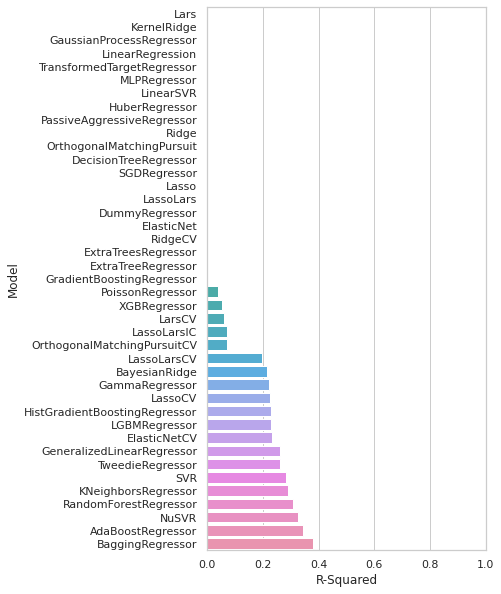

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

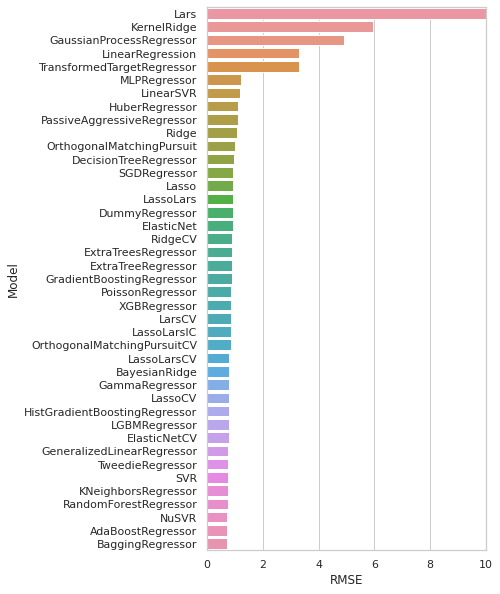

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

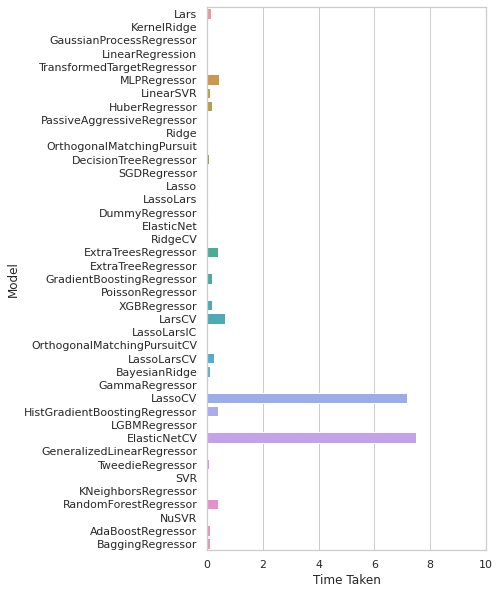

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 10))